# Phloem Flow Coupling

In [1]:
import scipy.sparse.linalg as LA
from scipy import sparse
import matplotlib.pylab as plt

import py_plantbox as pb
from rb_tools import *

import xylem_flux 

import timeit

import numpy as np
from scipy.integrate import odeint



# Simulate a root system
name = "Phloem"
plant = pb.Plant()
#sca = pb.Organ.getScalar('organtype')
plant.openXML(name)
plant.initialize()
ana = pb.SegmentAnalyser(plant)

for i in range (0,10):
    plant.simulate(i)
# for i in range(0,7):
#     plant.simulate(1) 

# Create graph
nodes = vv2a(plant.getNodes())/100 # convert from cm to m 
rseg = seg2a(plant.getSegments(15)) # root system segments
#sseg = seg2a(plant.getSegments(4)) # strm system segments
lseg = v2ai(plant.getNodesOrganType())
#seg = np.vstack((sseg,rseg))
#seg = np.vstack((seg,lseg))
# print("number of root segments",len(rseg))
# print("number of shoot segments",len(sseg))
# print("number of segments",len(seg))

#rootnodes = v2a(sca('organtype'))

#print(rseg)
#print(sseg)
#print(lseg)
#print(sseg[1])

#print(len(nodes))
#print(len(rseg))
#print(len(lseg))



plant.write("results/Phloem.vtp",15)


 $J_{\mathrm{WX}}=-\Delta P_{\mathrm{X}}/\mathrm{r_{X}}$.Xylem flow between connected elements,  
Phloem flow between connected elements, $J_{\mathrm{WP}}=-\Delta P_{\mathrm{P}}/\mathrm{r_{P}}$.

Lateral water flow from xylem to phloem is driven by the difference in water potential. $
J_{Wlat}=(\psi_{\mathrm{X}}-\psi_{\mathrm{P}})/\mathrm{r_{lat}}
$  
Taking into account the non-zero partial molal volume of sucrose $\mathrm{\overline{V}}$ adds an extra lateral component to the liquid flow into the sieve tubes: $J_{Wlat}=\mathrm{\overline{V}}\times J_{Slat} (\psi_{\mathrm{X}}-\psi_{\mathrm{P}})/\mathrm{r_{lat}}$  
Hydrostatic pressure $P_{\mathrm{P}}$ within the sieve tubes is given by the difference between total phloem water potential and osmotic potential inside sieve tubes: $P_{\mathrm{P}}=\psi_{\mathrm{P}}-\Pi$

Xylem sap has a very low solute concentration which we shall ignore, so there is no osmotic component to its total water potential:
$P_{\mathrm{X}}=\psi_{\mathrm{X}}$
For a single phloem solute, Π is determined by its concentration C. For a dilute solution, Π is given by the Van’t Hoff relation:

$\Pi= -\mathrm{R} \times \mathrm{T} \times C$  

for dilute solutions, where R is the universal gas constant and T the absolute temperature. For a non-dilute solution, we use the empirical equation stated by Thompson and Holbrook (2003),

$\Pi= -ρ \times \mathrm{T} \times C$  
with $\mathrm{ρ_{w}}$ the density of water and m the molality given by  
$m = C/[\mathrm{ρ_{w}}(1-C \times \mathrm{\overline{V}})]$  

$\sum_{k} J_{W\_k}=0$

$J_{SP}= J_{WP} \times C$

$\frac{\mathrm{d}Q}{\mathrm{d}t}= -J_{Slat}-R_{\mathrm{M}}+\mathrm{Ph}-\frac{\mathrm{d}S}{\mathrm{d}t}$  

$R_{\mathrm{M}} = (\mathrm{K_4} + \mathrm{K_5} C) \times S_r$

where Sr is the structural carbon content of the element biomass, expressed in sucrose equivalents.

Starch metabolism is represented by a general equation derived from Daudet et al. (2002):

$\frac{\mathrm{d}S}{\mathrm{d}t}= \frac{\mathrm{V_{max}}\times C_{\mathrm{Par}}}{K_m+C_{\mathrm{Par}}}\times V_{\mathrm{Par}} - k_hyd \times S +k_6 \times(C_{\mathrm{Par}}-C_{\mathrm{targ}}) \times V_{\mathrm{Par}}$



In [3]:
C_targ = 0.1
r_lat = 23.5785
k_1 = 3.23994
k_2 = -3.23994
k_3 = 0
k_4 = 0
k_5 = 0
k_6 = 0
k_hyd = 0
k_M = 1.0
Ph = 0
R = 0.0083143
r_P = 14050.3
r_x = 0.0
T = 293
V_mean = 0.2155
v_max = 0
Rou_w = 0.99803



J_Wlat = (Phi_x - Phi_p)/r_lat
P_p = Phi_p - Pi_osmotic
Pi_osmotic = -R * T * C

SyntaxError: invalid syntax (<ipython-input-3-82ea8516fbf3>, line 8)

In [2]:
plant_ana = pb.SegmentAnalyser(plant) 

nodes = vv2a(plant.getNodes())/100 # convert from cm to m 
node_connection = seg2a(plant.getSegments(15)) # plant segments
#sseg = seg2a(plant.getSegments(4)) #
node_organtype = v2ai(plant.getNodesOrganType())


nodes_with_organtype = np.column_stack([node_connection, node_organtype]) #make the node has organtype, to know the source sink relation

node_connection1, node_connection2 = np.split(node_connection.T,2)

node_connection1 = np.row_stack([node_connection1, node_organtype])
node_connection2 = np.row_stack([node_connection2, node_organtype])

nodes_organtype = np.column_stack([node_connection1,node_connection2])
_, indices = np.unique(nodes_organtype.T[:,0], return_index=True)
nodes_organtype = nodes_organtype.T[indices,:]



#print(nodes_organtype)
#print(node_connection2)
#print(nodes_with_organtype)   
print(node_connection)

unq, unq_idx, unq_cnt = np.unique(node_connection, return_inverse=True, return_counts=True)
#print(unq) 

#print(unq_cnt) 

#print(len(nodes))
#print(len(unq))
 
#print(len(unq_cnt))
#print(len(node_connection))

#type = v2a(plant.getScalar(15,"subtype"))
#otype = v2a(plant.getScalar(15,"organtype"))
#print(otype)
#print(len(otype))


nodes_organtype = np.column_stack((nodes_organtype,unq_cnt ))
nodes_organtype.astype(np.int_)

node_connection.astype(np.int_)
print(len(node_connection))
print(len(nodes_organtype))
print(nodes_organtype)
print(node_connection)

[[ 0  2]
 [ 2  3]
 [ 3  4]
 [ 4  5]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]
 [10 18]
 [18 19]
 [19 20]
 [ 5 25]
 [25 27]
 [27 28]
 [28 29]
 [29 30]
 [30 33]
 [33 34]
 [34 35]
 [ 1 11]
 [11 12]
 [12 13]
 [13 14]
 [14 15]
 [15 16]
 [16 17]
 [17 21]
 [21 22]
 [22 23]
 [23 24]
 [24 26]
 [26 31]
 [31 32]]
34
36
[[ 0  2  1]
 [ 1  4  1]
 [ 2  2  2]
 [ 3  2  2]
 [ 4  2  2]
 [ 5  2  3]
 [ 6  2  2]
 [ 7  2  2]
 [ 8  2  2]
 [ 9  2  2]
 [10  2  2]
 [11  4  2]
 [12  4  2]
 [13  4  2]
 [14  4  2]
 [15  4  2]
 [16  4  2]
 [17  4  2]
 [18  2  2]
 [19  2  2]
 [20  2  1]
 [21  4  2]
 [22  4  2]
 [23  4  2]
 [24  4  2]
 [25  2  2]
 [26  8  2]
 [27  2  2]
 [28  2  2]
 [29  2  2]
 [30  2  2]
 [31  8  2]
 [32  8  1]
 [33  2  2]
 [34  2  2]
 [35  2  1]]
[[ 0  2]
 [ 2  3]
 [ 3  4]
 [ 4  5]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]
 [10 18]
 [18 19]
 [19 20]
 [ 5 25]
 [25 27]
 [27 28]
 [28 29]
 [29 30]
 [30 33]
 [33 34]
 [34 35]
 [ 1 11]
 [11 12]
 [12 13]
 [13 14]
 [14 15]
 [15 16]
 [16 17]
 [17 21]
 [

In [5]:

#condition = ==0
#print(nodes_organtype[:,0])
nodes_organtype[1,2] =2
nodes_organtype[1,1] =1
node_connection[0,0] =1
#print(nodes_organtype)


N2_node = nodes_organtype[ (nodes_organtype[:,2] ==2 )]
print(len(N2_node))
N2_c_nd_1 = list(range(1, len(N2_node)+1))
N2_conn_1 = list(range(1, len(N2_node)+1))
for i in range(len(N2_node)):
    N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
    N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]

print(len(N2_c_nd_1))
print(len(N2_conn_1))
for i in range(len(N2_node)):
    print(N2_c_nd_1[i][0,1])
for i in range(len(N2_node)):
    print(N2_conn_1[i][0]+1)
#np.copyto(a,nodes_organtype,'no', condition)

31
31
31
2
3
4
5
7
8
9
10
18
12
13
14
15
16
17
21
19
20
22
23
24
26
27
31
28
29
30
33
32
34
35
1
2
3
4
6
7
8
9
10
22
23
24
25
26
27
28
11
12
29
30
31
32
14
33
15
16
17
18
34
19
20


In [6]:
#print(N2_node)


temp= N2_c_nd_1[0][1]
temp=temp[::-1] 
print(temp )
N2_c_nd_2 = list(range(1, len(N2_node)+1))
N2_conn_2 = list(range(1, len(N2_node)+1))
print(node_connection)
for i in range(len(N2_node)):
    N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
N2_c_nd_2[0] = np.array([temp]) 
print(N2_c_nd_2)
for i in range(len(N2_node)):
    N2_conn_2[i] = np.where( node_connection[:,0] == N2_c_nd_2[i][0,1])[0]

N2_conn_2[0]=N2_conn_2[0][::-1] 
#print(N2_c_nd_2)
#print(len(N2_conn_2))
for i in range(len(N2_node)):
    print(N2_c_nd_2[i][0,0],'\n')
for i in range(len(N2_node)):
    print(N2_conn_2[i][0])
#np.copyto(a,nodes_organtype,'no', condition)



[11  1]
[[ 1  2]
 [ 2  3]
 [ 3  4]
 [ 4  5]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]
 [10 18]
 [18 19]
 [19 20]
 [ 5 25]
 [25 27]
 [27 28]
 [28 29]
 [29 30]
 [30 33]
 [33 34]
 [34 35]
 [ 1 11]
 [11 12]
 [12 13]
 [13 14]
 [14 15]
 [15 16]
 [16 17]
 [17 21]
 [21 22]
 [22 23]
 [23 24]
 [24 26]
 [26 31]
 [31 32]]
[array([[11,  1]], dtype=uint32), array([[1, 2]], dtype=uint32), array([[2, 3]], dtype=uint32), array([[3, 4]], dtype=uint32), array([[5, 6]], dtype=uint32), array([[6, 7]], dtype=uint32), array([[7, 8]], dtype=uint32), array([[8, 9]], dtype=uint32), array([[ 9, 10]], dtype=uint32), array([[ 1, 11]], dtype=uint32), array([[11, 12]], dtype=uint32), array([[12, 13]], dtype=uint32), array([[13, 14]], dtype=uint32), array([[14, 15]], dtype=uint32), array([[15, 16]], dtype=uint32), array([[16, 17]], dtype=uint32), array([[10, 18]], dtype=uint32), array([[18, 19]], dtype=uint32), array([[17, 21]], dtype=uint32), array([[21, 22]], dtype=uint32), array([[22, 23]], dtype=uint32), array

In [223]:
vML = np.zeros(len(nodes_organtype)+1)
kMU = np.zeros(len(nodes_organtype)+1)
kMParMb = np.zeros(len(nodes_organtype)+1)
vMParMb = np.zeros(len(nodes_organtype)+1)
kM = np.zeros(len(nodes_organtype)+1)
Vmax = np.zeros(len(nodes_organtype)+1)
C_targ = np.zeros(len(nodes_organtype)+1)
kHyd = np.zeros(len(nodes_organtype)+1)
k1 = np.zeros(len(nodes_organtype)+1)
k2 = np.zeros(len(nodes_organtype)+1)
k3 = np.zeros(len(nodes_organtype)+1)
StructC = np.zeros(len(nodes_organtype)+1)
vol_ST = np.zeros(len(nodes_organtype)+1)
volPhlApo = np.zeros(len(nodes_organtype)+1)
volParApo = np.zeros(len(nodes_organtype)+1)
k_Lockhart = np.zeros(len(nodes_organtype)+1)
P_thr = np.zeros(len(nodes_organtype)+1)
vol_Sympl_max = np.zeros(len(nodes_organtype)+1)

In [7]:
# file-output.py



Nt = len(nodes)-1
Nc = len(node_connection)



N1L_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & (nodes_organtype[:,1] ==8 ) & (nodes_organtype[:,2] ==1 )]
N1L_c_nd = [1,len(N1L_node)]
N1L_conn = [1,len(N1L_node)]
for i in range(len(N1L_node)):
    N1L_c_nd[i] = node_connection[(node_connection[:,1] == N1L_node[i,0])]
    N1L_conn[i] = np.where( node_connection[:,1] == N1L_node[i,0])[0]


N1R_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & (nodes_organtype[:,1] ==2 ) & (nodes_organtype[:,2] ==1 )]
N1R_c_nd = [1,len(N1R_node)]
N1R_conn = [1,len(N1R_node)]
for i in range(len(N1R_node)):
    N1R_c_nd[i] = node_connection[(node_connection[:,1] == N1R_node[i,0])]
    N1R_conn[i] = np.where( node_connection[:,1] ==N1R_node[i,0])[0]
N1R_r_abs = 1e-025

N2_node = nodes_organtype[ (nodes_organtype[:,2] ==2 )]

#print(N2_node)
N2_c_nd_1 = list(range(1, len(N2_node)+1))
N2_conn_1 = list(range(1, len(N2_node)+1))
for i in range(len(N2_node)):
    N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
    N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]

temp= N2_c_nd_1[0][1]
temp=temp[::-1] 
print(temp )
N2_c_nd_2 = list(range(1, len(N2_node)+1))
N2_conn_2 = list(range(1, len(N2_node)+1))

for i in range(len(N2_node)):
    N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
N2_c_nd_2[0] = np.array([temp]) 
print(N2_c_nd_2)
for i in range(len(N2_node)):
    N2_conn_2[i] = np.where( node_connection[:,0] == N2_c_nd_2[i][0,1])[0]

N2_conn_2[0]=N2_conn_2[0][::-1] 





N3_node = []

#'******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n'
#initialization of the parameters
kML = np.zeros(len(nodes_organtype))
vML = np.zeros(len(nodes_organtype))
kMU = np.zeros(len(nodes_organtype))
vMU = np.zeros(len(nodes_organtype))
kMParMb = np.zeros(len(nodes_organtype))
vMParMb = np.zeros(len(nodes_organtype))
kM = np.zeros(len(nodes_organtype))
Vmax = np.zeros(len(nodes_organtype))
C_targ = np.zeros(len(nodes_organtype))
kHyd = np.zeros(len(nodes_organtype))
k1 = np.zeros(len(nodes_organtype))
k2 = np.zeros(len(nodes_organtype))
k3 = np.zeros(len(nodes_organtype))
StructC = np.zeros(len(nodes_organtype))
vol_ST = np.zeros(len(nodes_organtype))
volPhlApo = np.zeros(len(nodes_organtype))
volParApo = np.zeros(len(nodes_organtype))
k_Lockhart = np.zeros(len(nodes_organtype))
P_thr = np.zeros(len(nodes_organtype))
vol_Sympl_max = np.zeros(len(nodes_organtype))

r_Xyl = np.full(len(nodes_organtype), 1e-025)
r_ST = np.full(len(nodes_organtype), 1405.03)
r_Trsv = np.full(len(nodes_organtype), 100)
r_PhlMb = np.full(len(nodes_organtype), 135.785)
r_ParMb = np.full(len(nodes_organtype), 1e-025)
r_Apo = np.full(len(nodes_organtype), 1e-025)
r_Sympl = np.full(len(nodes_organtype), 1e-025)


for i in range(len(nodes_organtype)-1): #given different value based on whether it is source, sink or connection
    if nodes_organtype[i,1] == 8 and nodes_organtype[i,2] == 1: #all the sources       
        kML[i]     =  1e-100
        vML[i]        = 0.000143136      #different in source, sink or connection of piafmunch2
        kMU[i]        = 1e-100      #different in source, sink or connection of piafmunch2
        vMU[i]        = 0      #different in source, sink or connection of piafmunch2
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 1e-100
        Vmax[i]       = 0
        C_targ[i]     = 0.17      #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0
        k3[i]         = 0
        StructC[i]    = 0      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 8.83573e-05
        volPhlApo[i]  = 8.83573e-05
        volParApo[i]  = 8.83573e-05
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018
    elif nodes_organtype[i,1]>0 and nodes_organtype[i,2]==1 and nodes_organtype[i,0]==0:   #all the sinks  
        kML[i]     =  1e-100
        vML[i]        = 0.000143136      #different in source, sink or connection of piafmunch2
        kMU[i]        =   1e+99      #different in source, sink or connection of piafmunch2
        vMU[i]        = 2.82627e+95      #different in source, sink or connection of piafmunch2
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 1e-100
        Vmax[i]       = 0
        C_targ[i]     =     0.1     #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0
        k3[i]         = 0
        StructC[i]    = 1      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 8.83573e-05
        volPhlApo[i]  = 8.83573e-05
        volParApo[i]  = 8.83573e-05
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018
    elif nodes_organtype[i,2]!=1:
        kML[i]     =  1e-100
        vML[i]        = 0.000143136      #different in source, sink or connection of piafmunch2
        kMU[i]        = 1e-100      #different in source, sink or connection of piafmunch2
        vMU[i]        = 0      #different in source, sink or connection of piafmunch2
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 1e-100
        Vmax[i]       = 0
        C_targ[i]     = 0.1      #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0
        k3[i]         = 0
        StructC[i]    = 1      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 8.83573e-05
        volPhlApo[i]  = 8.83573e-05
        volParApo[i]  = 8.83573e-05
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018












f = open('PiafMunch2_python_test.ini','w')
f.write('******** DESCRIPTION OF ARCHITECTURE *********\n\n')

f.write("Total number of Nodes : {0} = {1}\n".format('Nt', Nt))
f.write("number of Internode Connections : {0} = {1}\n\n".format('Nc', Nc))

f.write("Nodes Of Connectivity Order 1, Transpiring Leaf Ends : {0} = {1}\n".format('N1L', len(N1L_node)))
f.write("{:s}  {:s}  {:s}\n".format('node#','c.node','conn.#'))
for i in range(len(N1L_node)):
    f.write("{:d}  {:d}  {:d}\n\n".format(N1L_node[i][0],N1L_c_nd[i][0,0],(N1L_conn[i][0])))





f.write("Nodes Of Connectivity Order 1, Absorbing Root Ends : {0} = {1}\n\n".format('N1R', len(N1R_node)))
f.write("{:s}  {:s}  {:s}  {:s}\n".format('node#','c.node','conn.#','r_abs'))
for i in range(len(N1R_node)):
    f.write("{:d}  {:d}  {:d} {:f}\n\n".format(N1R_node[i][0], N1R_c_nd[i][0,0],0- N1R_conn[i][0], N1R_r_abs))


f.write('Nodes Of Connectivity Order 2 :  {0} = {1}\n\n' .format('N2', len(N2_node) ))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2'))
for i in range(len(N2_node)):
    f.write("{:d}  {:d}  {:d} {:d} {:d} \n".format(N2_node[i][0],N2_c_nd_1[i][0,1],N2_conn_1[i][0]+1,N2_c_nd_2[i][0,0],0 -N2_conn_2[i][0]))    

f.write("Nodes Of Connectivity Order 3 :  {0} = {1}\n".format('N3', np.count_nonzero(unq_cnt == 3)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3'))
f.write("Nodes Of Connectivity Order 4 :  {0} = {1}\n\n".format('N4', len(N3_node)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4'))
f.write("Nodes Of Connectivity Order 5 :  {0} = {1}\n\n".format('N5', len(N3_node)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5'))
f.write("Nodes Of Connectivity Order 6 :  {0} = {1}\n".format('N6', len(N3_node)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6'))
f.write("Nodes Of Connectivity Order 7 :  {0} = {1}\n".format('N7', len(N3_node)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6','c.nd.7','conn.7'))
f.write("Nodes Of Connectivity Order 8 :  {0} = {1}\n".format('N8', len(N3_node)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6','c.nd.7','conn.7','c.nd.8','conn.8'))

f.write('******** WATER FLUX - RELATED PARAMETERS *********\n\n')
f.write("{:s}  {:s}  {:s} \n".format("T\xb0K",'visco=f(C)','NonLin.Psi+NonZeroSugarVol.'))
f.write("{:s}  {:s}  {:s} \n".format('293','true','true'))

f.write('InterNode Connections -- Axial Resistances (MPa h / ml) : Nc= {}\n' .format(len(N2_node)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','upfl.node','dnfl.node','r_Xyl','r_ST' ))
for i in range(len(node_connection)):
    f.write("{:d}  {:d}  {:d} {:f} {:f}\n".format(i+1,node_connection[i,0],node_connection[i,1],r_Xyl[i],r_ST[i]))
f.write('\n')

f.write('Individual Node : Lateral Resistances (MPa h / ml)\n')
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','r_Trsv','r_PhlMb','r_ParMb','r_Apo', 'r_Sympl' ))
for i in range(len(nodes_organtype)-1):
    f.write("{:d}  {:f}  {:f} {:f} {:f} {:f}\n".format(nodes_organtype[i+1][0],r_Trsv[i],r_PhlMb[i],r_ParMb[i],r_Apo[i],r_Sympl[i]))
f.write('\n')


f.write('******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n')    
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s} \n".format('node#','kML(M)','vML(mmol/h)','kMU(M)','vMU(mmol/h)', 'kMParMb(M)','vMParMb(mmol/h)','kM(M)','Vmax(M/h)','C_targ(M)','kHyd(h-1)','k1(h-1)','k2','k3(h-1)','StructC','vol_ST(ml)','volPhlApo,ml','volParApo,ml','k_Lockhart','P_thr(MPa)','vol_Sympl_max,ml' ))    
for i in range(len(N2_node)):
    f.write("{:d}  {:f}  {:f} {:f} {:f} {:f}  {:f}  {:f} {:f} {:f} {:f}  {:f}  {:f} {:f} {:f} {:f}  {:f}  {:f} {:f} {:f} {:f}\n".format(N2_node[i][0],kML[i], vML[i], kMU[i], vMU[i], kMParMb[i], vMParMb[i], kM[i], Vmax[i], C_targ[i], kHyd[i], k1[i], k2[i], k3[i], StructC[i], vol_ST[i], volPhlApo[i], volParApo[i], k_Lockhart[i], P_thr[i], vol_Sympl_max[i]))
f.write('\n')    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    








f.close()

[11  1]
[array([[11,  1]], dtype=uint32), array([[1, 2]], dtype=uint32), array([[2, 3]], dtype=uint32), array([[3, 4]], dtype=uint32), array([[5, 6]], dtype=uint32), array([[6, 7]], dtype=uint32), array([[7, 8]], dtype=uint32), array([[8, 9]], dtype=uint32), array([[ 9, 10]], dtype=uint32), array([[ 1, 11]], dtype=uint32), array([[11, 12]], dtype=uint32), array([[12, 13]], dtype=uint32), array([[13, 14]], dtype=uint32), array([[14, 15]], dtype=uint32), array([[15, 16]], dtype=uint32), array([[16, 17]], dtype=uint32), array([[10, 18]], dtype=uint32), array([[18, 19]], dtype=uint32), array([[17, 21]], dtype=uint32), array([[21, 22]], dtype=uint32), array([[22, 23]], dtype=uint32), array([[23, 24]], dtype=uint32), array([[ 5, 25]], dtype=uint32), array([[24, 26]], dtype=uint32), array([[25, 27]], dtype=uint32), array([[27, 28]], dtype=uint32), array([[28, 29]], dtype=uint32), array([[29, 30]], dtype=uint32), array([[26, 31]], dtype=uint32), array([[30, 33]], dtype=uint32), array([[33, 34]

In [319]:

print(np.full((9), 10)
     )


[10 10 10 10 10 10 10 10 10]


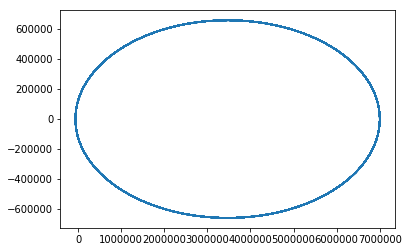

In [21]:
# function that returns dy/dt
def ds_dt(y, t):


    G = 6.672*(10**-11)
    M = 5.972*(10**24)
    mu = G*M
    r = np.sqrt(y[0]**2 + y[1]**2 + y[2]**2)

    dy0 = y[3]
    dy1 = y[4]
    dy2 = y[5]
    dy3 = -(mu / (r**3)) * y[0]
    dy4 = -(mu / (r**3)) * y[1]
    dy5 = -(mu / (r**3)) * y[2]
    return [dy0, dy1, dy2, dy3, dy4, dy5]

t = np.arange(0, 100000, 0.1)
y0 = [7.e6, 0., 0., 0., 1.e3, 0.]
y = odeint(dr_dt, y0, t)
plt.plot(y[:,0], y[:,1])
plt.show()



In [18]:
# Adjacency matrix
A = sparse.coo_matrix((np.ones(seg.shape[0]),(seg[:,0],seg[:,1]))) 

# Parameters for flux model
rs_Kr = np.array([ 2.e-10, 2.e-10, 2.e-10, 2.e-10, 2.e-10, 2.e-11, 2.e-11 ]) # s/m; root hydraulic radial conductivity per root type 
rs_Kz = np.array([ 5.e-14, 5.e-14, 5.e-14, 5.e-14, 5.e-14, 5.e-14, 5.e-14 ]) # m2*s; root hydraulic axial conductivity per root type 

soil_psi = -700 # static soil pressure J kg^-1

rho = 1e3 # kg / m^3      
g = 1.e-3*9.8065 # m / s^2   

pot_trans = np.array([-1.15741e-10]) # # m^3 s^-1 potential transpiration

# Conversions
plant_ana = pb.SegmentAnalyser(plant) 
radius = v2a(plant_ana.getScalar("radius"))/100. # convert from cm to m
type = v2a(plant_ana.getScalar("subtype"))
kr = np.array(list(map(lambda t: rs_Kr[int(t)-1], type))) # convert from 'per type' to 'per segment'
kr.resize((kr.shape[0],1))
kz = np.array(list(map(lambda t: rs_Kz[int(t)-1], type)))     
kz.resize((kz.shape[0],1))          

print(radius)
# glue together shoot and root segments
shoot1 = np.ones((sseg.shape[0],1))                    
shoot0 = np.ones((sseg.shape[0],1))
radius = np.vstack((shoot1,radius))
kr =  np.vstack((shoot0,kr))
kz =  np.vstack((shoot1,kz))  
            
# Call back function for soil potential
soil = lambda x,y,z : soil_psi

# Calculate fluxes within the root system
Q, b = xylem_flux.linear_system(seg, nodes, radius, kr, kz, rho, g, soil)
# plt.spy(Q)
# plt.show()
Q, b = xylem_flux.bc_neumann(Q, b, np.array([0]), np.array([pot_trans]))


start = timeit.default_timer()
x = LA.spsolve(Q, b, use_umfpack = True) # direct
stop = timeit.default_timer()
print ("linear system solved in", stop - start, " s") 
      
# Save results into vtp 
segP = nodes2seg(nodes,seg,x)# save vtp 
axial_flux = xylem_flux.axial_flux(x, seg, nodes, kz, rho, g)
radial_flux = xylem_flux.radial_flux(x, seg, nodes, radius, kr, soil)
net_flux = axial_flux+radial_flux

plant_ana.addUserData(a2v(segP[sseg.shape[0]:]),"pressure")
plant_ana.addUserData(a2v(axial_flux[sseg.shape[0]:]),"axial_flux")
plant_ana.addUserData(a2v(radial_flux[sseg.shape[0]:]),"radial_flux")
plant_ana.addUserData(a2v(net_flux[sseg.shape[0]:]),"net_flux")

plant_ana.write("results/Phloem.vtp")

[[0.00181054]
 [0.00181054]
 [0.00181054]
 [0.00181054]
 [0.00181054]
 [0.00181054]
 [0.00181054]
 [0.00181054]
 [0.00181054]
 [0.00181054]
 [0.00181054]
 [0.00181054]]
linear system solved in 0.009531487179487179  s


c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:192: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
